In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# eerst de dataset importeren, en de eerste paar rijen bekijken

In [15]:
df = pd.read_csv('student_lifestyle_dataset.csv')

In [16]:
# Display first 15 rows of the dataset
df.head()

,student_id,age,gender,study_hours,sleep_hours,coffee_intake,grades,attendance_rate,stress_level,social_media_hours,part_time_job,major,weekly_exercise_hours,satisfaction_level,internet_usage_gb
0,S1000,23,Other,7.3,7.8,2,73.9,98.7,3,3.9,yes,Engineering,NaN,4,22.6
1,S1001,20,F,5.9,NaN,0,77.0,51.0,1,1.0,yes,Medicine,2.8,4,16.8
2,S1002,29,Female,2.7,8.1,1,NaN,86.9,3,2.6,Y,Medicine,1.9,10,2.3
3,S1003,27,Male,6.2,10.3,3,76.6,88.4,6,1.8,Y,Engineering,2.7,2,24.9
4,S1004,24,NaN,3.2,NaN,1,NaN,62.2,8,2.3,no,AI,1.5,1,18.7


In [17]:
# show all na values in the dataset
print(df.isna().sum())

student_id                0
age                       0
gender                   25
study_hours               0
sleep_hours              15
coffee_intake             0
grades                   15
attendance_rate           0
stress_level              0
social_media_hours       15
part_time_job             0
major                     0
weekly_exercise_hours    15
satisfaction_level        0
internet_usage_gb         0
dtype: int64


### er zijn een aantal na antwoorden die gaan we fillen met data

In [18]:
# create cleaned df without na values
# if gender is na, fill with 'Other'
df_cleaned = df.copy()
df_cleaned['gender'] = df_cleaned['gender'].fillna('Other')
# if sleep_hours is na, fill with mean sleep_hours
df_cleaned['sleep_hours'] = df_cleaned['sleep_hours'].fillna(df_cleaned['sleep_hours'].mean())
# if grades is na, fill with mean grades
df_cleaned['grades'] = df_cleaned['grades'].fillna(df_cleaned['grades'].mean())
# if social_media_hours is na, fill with mean social_media_hours
df_cleaned['social_media_hours'] = df_cleaned['social_media_hours'].fillna(df_cleaned['social_media_hours'].mean())
# if weekly_exercise_hours is na, fill with mean weekly_exercise_hours
df_cleaned['weekly_exercise_hours'] = df_cleaned['weekly_exercise_hours'].fillna(df_cleaned['weekly_exercise_hours'].mean())
# show all na values in the cleaned dataset
print(df_cleaned.isna().sum())

student_id               0
age                      0
gender                   0
study_hours              0
sleep_hours              0
coffee_intake            0
grades                   0
attendance_rate          0
stress_level             0
social_media_hours       0
part_time_job            0
major                    0
weekly_exercise_hours    0
satisfaction_level       0
internet_usage_gb        0
dtype: int64


# nu gaan we de data analyseren

Text(0.5, 1.0, 'Distribution of Grades')

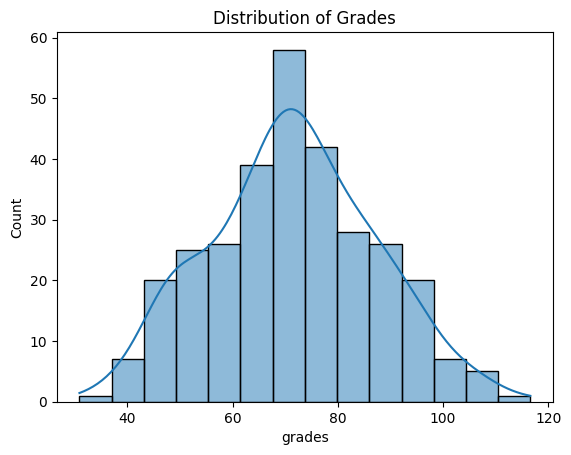

In [19]:
 # Analyze the distribution of individual variables (e.g. grades, study_hours, stress_level)
sns.histplot(df_cleaned['grades'], kde=True)
plt.title('Distribution of Grades')

### dit lijkt sterk op een normale verdeling

rond de 70 is het hoogst en bij een hoog aantal ook nog

Text(0.5, 1.0, 'Distribution of Study Hours')

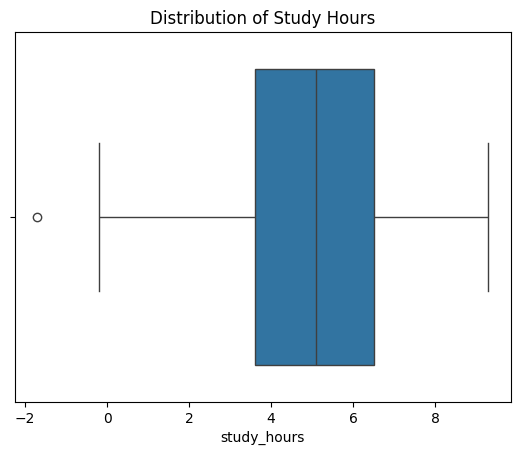

In [21]:
# Analyze the distribution of study_hours with a boxplot
sns.boxplot(x=df_cleaned['study_hours'])
plt.title('Distribution of Study Hours')

### wat ik hier zie:
1 uitschieter die negatief studeert???

25% tussen 0 en 3.75 uur

50% tussen 3.75 en 6.25 uur

25% meer dan 6.25 uur

mediaan ligt rond de 5 uur


Text(0.5, 1.0, 'Distribution of Gender')

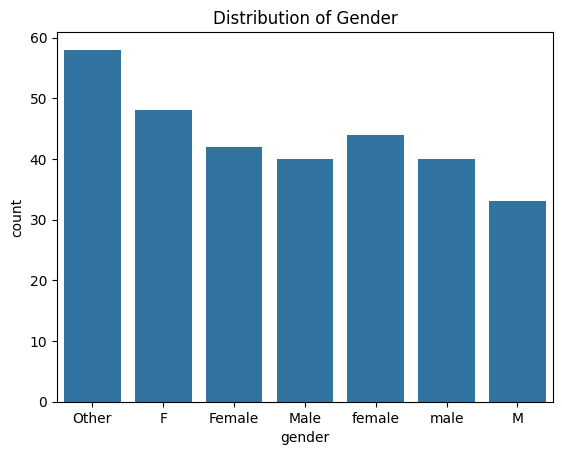

In [23]:
# bar chart for distribuition of gender
sns.countplot(x=df_cleaned['gender'])
plt.title('Distribution of Gender')

Text(0.5, 1.0, 'Distribution of Gender')

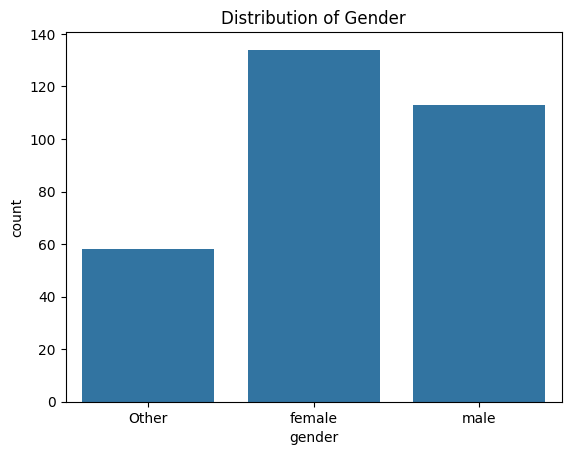

In [25]:
# i see alot of duplicate gender values let's normalize them
# if gender = Male gender, Male or M let's make it male
df_cleaned['gender'] = df_cleaned['gender'].replace(['Male gender', 'M', 'Male'], 'male')
# if gender = Female or F let's make it female
df_cleaned['gender'] = df_cleaned['gender'].replace(['Female', 'F'], 'female')

# bar chart for distribuition of gender
sns.countplot(x=df_cleaned['gender'])
plt.title('Distribution of Gender')


### we zien hier dus dat er meer females zijn dan males, en allebei meer dan Other

# Bivariate analysis

Text(0.5, 1.0, 'Coffee Intake vs Sleep Hours')

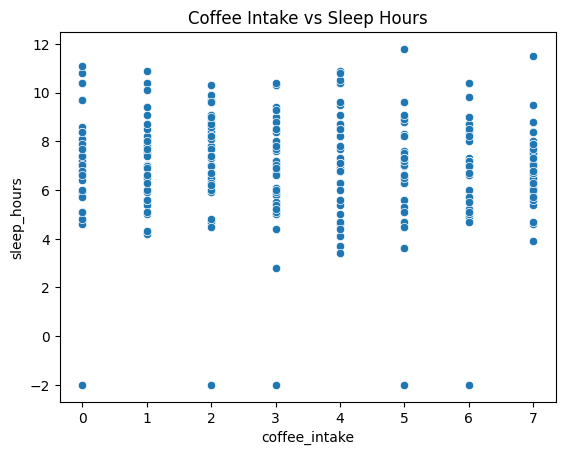

In [43]:
# correlation between coffe intake and sleep_hours
sns.scatterplot(x=df_cleaned['coffee_intake'], y=df_cleaned['sleep_hours'])
plt.title('Coffee Intake vs Sleep Hours')

## dit ziet er vreemd uit en ik kan niet met duidelijkheid zeggen of er daadwerkelijk een correlatie is, er is wel een verband 

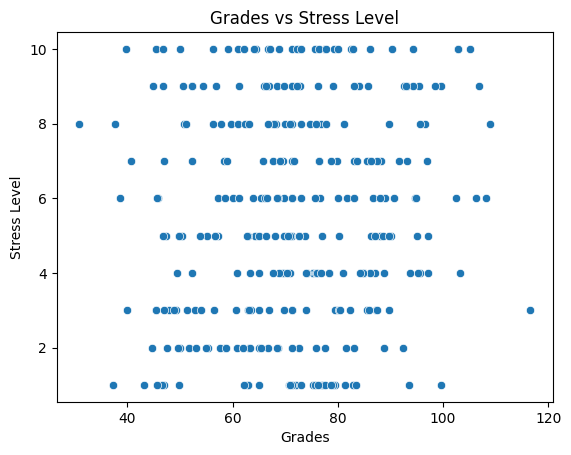

In [ ]:
# correlation between grades and stress_level using scatter plot
sns.scatterplot(x=df_cleaned['grades'], y=df_cleaned['stress_level'])
plt.title('Grades vs Stress Level')
plt.xlabel('Grades')
plt.ylabel('Stress Level')
plt.show()


## alweer een vreemde scatterplot, er is een relatie maar heel vreemd


# multivariate analyse

Text(0.5, 1.0, 'Heatmap of Numerical Features Correlation')

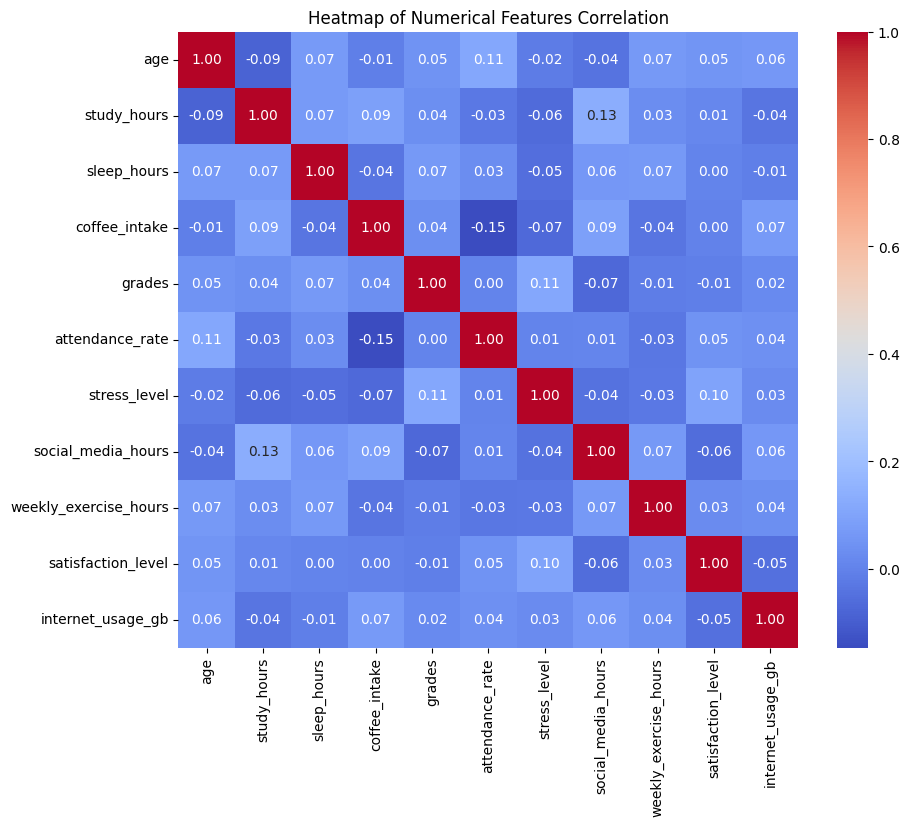

In [52]:
#we can use regression models, clustering, and visualize using heatmaps, pairplots or 3d-plots to better understand the multivariate relationships in the dataset.
# let's do heatmap of numerical features first
numerical_features = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Features Correlation')

### het ziet er naar uit dat er maar weinig correlaties zijn, zowel positief als negatief

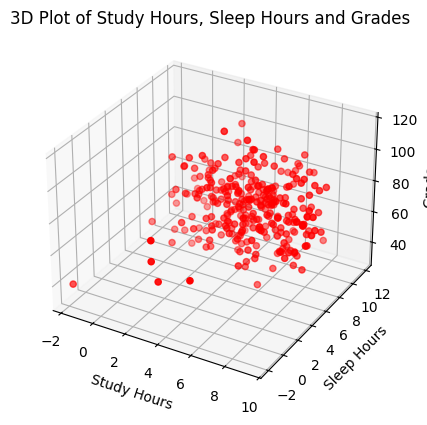

In [54]:
# now we can try a 3d plot between grades, study_hours and sleep_hours
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cleaned['study_hours'], df_cleaned['sleep_hours'], df_cleaned['grades'], c='r', marker='o')
ax.set_xlabel('Study Hours')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Grades')
plt.title('3D Plot of Study Hours, Sleep Hours and Grades')
plt.show()


### we zien dat er een soort cluster vormt rondom het midden van study hours (4) achterin sleephours (10-12) en middelmatige kant van grades (40-70)

# conclusie:
deze dataset is vooral erg vaag, met missende values, heel veel na's en duplicate values

er zat amper correlatie in de dataset, terwijl je die wel zou verwachten (studytime - grades zou een positieve correlatie moeten hebben realistisch gezien maar dat heeft het hier dus niet)